In [ ]:
#%%

### ch11. KNN分类器(简单交易策略)
#################################

# 11.1 KNN模型简介
# 11.2 KNN分类器简单示例（数据准备-模型训练）
# 11.3 简单交易策略（KNN应用）

In [ ]:
#%%

### 11.1 KNN模型简介
##############################################

'''
KNN（K-Nearest Neighbors）分类器是一种基于实例的学习方法，用于分类任务。它的基本思想是：给定一个训练数据集，当新的输入实例到达时，通过计算它与训练集中所有实例的距离，找到距离最近的K个实例（邻居），然后根据这K个实例的类别进行投票，将新实例分类为其中占比最多的类别。

KNN算法可用在以下场景：
- 分类任务：将样本分类为不同的类别。
- 回归任务：根据样本特征预测连续值。

KNN算法的优势包括：
- 简单易实现：KNN算法的原理相对简单，易于理解和实现。
- 无需训练：KNN算法是一种基于实例的学习方法，无需显式的训练过程，直接使用训练数据进行分类或回归预测。

KNN算法的劣势包括：
- 计算复杂度高：KNN算法在预测新实例时需要计算它与所有训练实例的距离，当训练集很大时，计算复杂度较高。
- 对特征缩放敏感：KNN算法对特征的缩放敏感，不同特征的取值范围不同会对距离计算产生影响，需要进行特征缩放处理。
'''
print("准备好了，go")

准备好了，go


In [ ]:
#%%

### 11.2 KNN""分类器简单示例（数据准备-模型训练））
##############################################

# 首先以著名的鸢尾花数据集为例完成一次最简单的KNN分类过程

# 首先导入鸢尾花数据载入工具
from sklearn.datasets import load_iris
# 导入KNN分类模型
from sklearn.neighbors import KNeighborsClassifier
# 为了方便可视化，我们再导入matplotlib和seaborn
import matplotlib.pyplot as plt
# import seaborn as sns


# #加载鸢尾花数据集，赋值给iris变量
iris = load_iris()
print(f"导入鸢尾花数据集,完成一次最简单的KNN分类：")
# print({iris.DESCR})
#查看数据集的键名
print(f"\n数据集的键名：\n{iris.keys()}")      
#查看数据集的特征名称
print(f"\n数据集的特征名称：\n{iris.feature_names}")

#查看数据集中的样本分类
print(f"\n数据集的样本分类：\n{iris.target}")

print("\n\n训练集和测试集的拆分：")
#将样本的特征和标签分别赋值给X和y
X, y = iris.data, iris.target

#查看是否成功
# X.shape

# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
#将X和y拆分为训练集与验证集
X_train, X_test, y_train, y_test = train_test_split(X, y)
#查看拆分情况
print(f"训练集X的特征形状：{X_train.shape}")
print(f"验证集X的特征形状：{X_test.shape}")
print(f"训练集y的标签形状：{y_train.shape}")
print(f"验证集y的标签形状：{y_test.shape}")

#创建knn分类器,参数保持默认
knn_clf = KNeighborsClassifier()
#使用训练集拟合模型
knn_clf.fit(X_train, y_train)
#查看模型在训练集和验证集中的准确率
print("\nKNN分类器训练结果：")
print('训练集准确率：%.2f'%knn_clf.score(X_train, y_train))
print('验证集准确率：%.2f'%knn_clf.score(X_test, y_test))
print(f"\nKNN分类器的默认参数：{knn_clf.get_params()}")

导入鸢尾花数据集,完成一次最简单的KNN分类：

数据集的键名：
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

数据集的特征名称：
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

数据集的样本分类：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


训练集和测试集的拆分：
训练集X的特征形状：(112, 4)
验证集X的特征形状：(38, 4)
训练集y的标签形状：(112,)
验证集y的标签形状：(38,)

KNN分类器训练结果：
训练集准确率：0.97
验证集准确率：0.97

KNN分类器的默认参数：{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
#%%

# 进阶（配置参数，使用网格搜索）

# 导入网格搜索
from sklearn.model_selection import GridSearchCV
# 定义一个从1到10的n_neighbors
n_neighbors = tuple(range(1,11,1))
# 创建网格搜索实例，estimator用KNN分类器
# 把刚刚定义的n_neighbors传入给param_grid参数
# cv参数指交叉验证次数为5
cv = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid = {'n_neighbors':n_neighbors},
    cv = 5)
# 使用网格搜索拟合数据集
cv.fit(X,y)
#查看最优参数
print(cv.best_params_)
print(n_neighbors)

{'n_neighbors': 6}
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)


In [ ]:
#%%

# 创建knn分类器,n_neighbors设置为6
knn_clf = KNeighborsClassifier(n_neighbors=6)
#使用模型拟合训练集数据
knn_clf.fit(X_train, y_train)
#查看模型在训练集和验证集中的准确率
print('训练集准确率：%.2f'%knn_clf.score(X_train, y_train))
print('验证集准确率：%.2f'%knn_clf.score(X_test, y_test))

训练集准确率：0.98
验证集准确率：0.97


In [ ]:
#%%

# 进阶：连续数据的KNN回归（以房价数据集为例）

# 载入房价数据集导入工具
from sklearn.datasets import fetch_california_housing
#将数据导入
housing = fetch_california_housing()
#查看数据集的键名
print(f"\n数据集的键名：\n{housing.keys()}")
#查看样本的特征名称
print(f"\n数据集的特征名称：\n{housing.feature_names}")

#选取前十套房屋，查看售价
print(f"\n数据集的前10个样本售价：\n{housing.target[:10]}")

#将样本特征和售价赋值给X，y
X, y = housing.data, housing.target
#使用train_test_split拆分为训练集和验证集
X_train, X_test, y_train, y_test =\
train_test_split(X, y)
#查看拆分的结果
X_train.shape

#导入KNN回归算法
from sklearn.neighbors import KNeighborsRegressor
#创建一个实例，参数保持默认
knn_reg = KNeighborsRegressor()
#拟合训练集数据
knn_reg.fit(X_train, y_train)
#查看模型在训练集和验证集的性能表现
print('训练集R平方：%.2f'%knn_reg.score(X_train, y_train))
print('验证集R平方：%.2f'%knn_reg.score(X_test, y_test))

#这次让n_neighbors参数从1到20遍历
n_neighbors = tuple(range(1,21,1))
#创建KNN回归的网格搜索实例
cv_reg = GridSearchCV(
    estimator = KNeighborsRegressor(),
    param_grid = {'n_neighbors':n_neighbors},
    cv = 5)
#用网格搜索拟合数据集
cv_reg.fit(X, y)
#返回最佳参数
print(cv_reg.best_params_)
#查看最佳参数对应的最佳模型R平方分数
print('最佳R平方分数：%.2f'%cv_reg.best_score_)


数据集的键名：
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

数据集的特征名称：
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

数据集的前10个样本售价：
[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]
训练集R平方：0.45
验证集R平方：0.15
{'n_neighbors': 10}
最佳R平方分数：0.03


In [ ]:
#%%

### 11.3 基于机器学习的简单交易策略
####################################

#导入Pandas
import pandas as pd
#导入numpy，一会儿会用到
import numpy as np
from functions_stock import get_stock_data_yf as get_stock_data

#首先我们来定义一个函数，用来获取数据
#传入的三个参数分别是开始日期，结束日期和输出的文件名
def load_stock(start_date, end_date, output_file):
    #首先让程序尝试读取已下载并保存的文件
    try:
        df = pd.read_pickle(output_file)
        #如果文件已存在，则打印载入股票数据文件完毕
        print('载入股票数据文件完毕')
    #如果没有找到文件，则重新进行下载
    except FileNotFoundError:
        print('文件未找到，重新下载中')
        #这里制定下载中国平安（601318）的交易数据
        #下载源为yahoo
        df = get_stock_data('601318.SH', start_date, end_date)
        # df = df.set_index('Date')
        #下载成功后保存为pickle文件
        df.to_pickle(output_file)
        #并通知我们下载完成
        print('下载完成')
    #最后将下载的数据表进行返回
    return df

#下面使用我们定义好的函数来获取中国平安的交易数据
#获取三年的数据，从2017年3月9日至2020年的3月5日
#保存为名为601318的pickle文件
zgpa = load_stock(
    start_date = '2017-03-09', 
    end_date = '2025-12-01',
    output_file = './data/601318.pkl')

#查看一下数据的前五行
zgpa.head()

载入股票数据文件完毕


,Close,High,Low,Open,Volume
Date,,,,,
2017-03-09,25.518734,25.532999,25.319035,25.511603,37796652
2017-03-10,25.390356,25.511604,25.376094,25.468810,20744676
2017-03-13,25.654247,25.704172,25.361830,25.390357,35999002
2017-03-14,25.632843,25.768355,25.540127,25.668506,27696420
2017-03-15,25.647114,25.675643,25.504471,25.590058,26872050


In [ ]:
#%%

#下面我们来定义一个用于分类的函数，给数据表增加三个字段
#首先是开盘价减收盘价，命名为‘Open-Close’
#其次是最高价减最低价，命名为‘High-Low’
def classification_tc(df):
    df['Open-Close'] = df['Open'] - df['Close']
    df['High-Low'] = df['High'] - df['Low']
    #在添加一个target字段，如果次日收盘价高于当日收盘价，则标记为1，反之为-1
    df['target'] = np.where(df['Close'].shift(-1)>df['Close'], 1, -1)
    #去掉有空值的行
    df = df.dropna()
    #将‘Open-Close’和‘High-Low’作为数据集的特征
    X = df[['Open-Close', 'High-Low']]
    #将target赋值给y
    y = df['target']
    #将处理好的数据表以及X与y进行返回
    return(df,X,y)

#下面定义一个用于回归的函数
#特征的添加和分类函数类似
#只不过target字段改为次日收盘价减去当日收盘价
def regression_tc(df):
    df['Open-Close'] = df['Open'] - df['Close']
    df['High-Low'] = df['High'] - df['Low']
    df['target'] = df['Close'].shift(-1) - df['Close']
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    y = df['target']
    #将处理好的数据表以及X与y进行返回
    return(df,X,y)

from sklearn.model_selection import train_test_split
#使用classification_tc函数生成数据集的特征与目标
df, X, y = classification_tc(zgpa)
#将数据集拆分为训练集与验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False,train_size=0.8)

df.head()

,Close,High,Low,Open,Volume,Open-Close,High-Low,target
Date,,,,,,,,
2017-03-09,25.518734,25.532999,25.319035,25.511603,37796652,-0.007131,0.213963,-1
2017-03-10,25.390356,25.511604,25.376094,25.468810,20744676,0.078454,0.135509,1
2017-03-13,25.654247,25.704172,25.361830,25.390357,35999002,-0.263891,0.342342,-1
2017-03-14,25.632843,25.768355,25.540127,25.668506,27696420,0.035663,0.228228,1
2017-03-15,25.647114,25.675643,25.504471,25.590058,26872050,-0.057056,0.171172,1


0.5309734513274337
0.5165094339622641


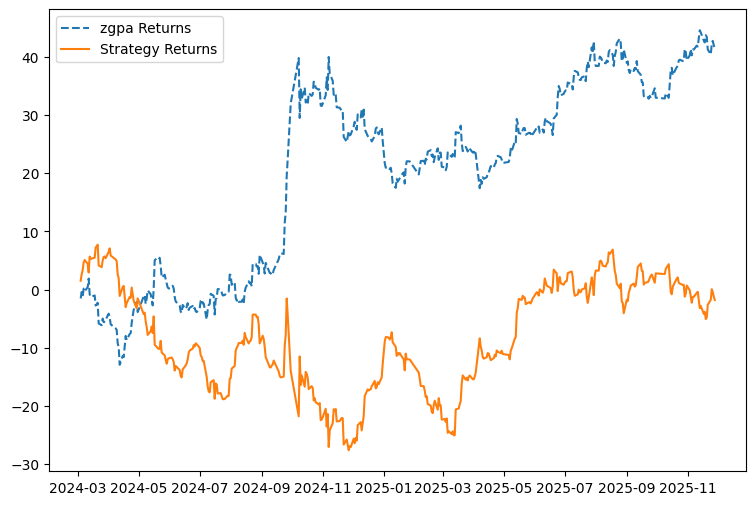

In [ ]:
#%%

from sklearn.neighbors import KNeighborsClassifier
#创建一个knn实例，n_neighbors取95
knn_clf = KNeighborsClassifier(n_neighbors=95)
#使用knn拟合训练集
knn_clf.fit(X_train, y_train)
#打印模型在训练集中的准确率
print(knn_clf.score(X_train, y_train))
#打印模型在验证集中的准确率
print(knn_clf.score(X_test, y_test))

#使用KNN模型预测每日股票的涨跌，保存为‘Predict_Signal’
df['Predict_Signal'] = knn_clf.predict(X)
#在数据集中添加一个字段，用当日收盘价除以前一日收盘价，并取其自然对数
df['Return'] = np.log(df['Close']/df['Close'].shift(1))
#查看一下
df.head()

#定义一个计算累计回报的函数
def cum_return(df, split_value):
    #该股票基准收益为‘Return’的总和*100
    cum_return = df[split_value:]['Return'].cumsum()*100
    #将计算结果进行返回
    return cum_return

#再定义一个计算使用策略交易的收益
def strategy_return(df, split_value):
    #使用策略交易的收益为模型‘zgpa_Return’乘以模型预测的涨跌幅
    df['Strategy_Return'] = df['Return']*df['Predict_Signal'].shift(1)
    #将每日策略交易的收益加和并乘以100
    cum_strategy_return = df[split_value:]['Strategy_Return'].cumsum()*100
    #将计算结果进行返回
    return cum_strategy_return

#定义一个绘图函数，用来对比基准收益和算法交易的收益
def plot_chart(cum_return, cum_strategy_return, symbol):
    #首先是定义画布的尺寸
    plt.figure(figsize=(9,6))
    #使用折线图绘制基准收益
    plt.plot(cum_return, '--',label='%s Returns'%symbol)
    #使用折线图绘制算法交易收益
    plt.plot(cum_strategy_return, label = 'Strategy Returns')
    #添加图注
    plt.legend()
    #plt.xticks([0,36,72,108,145])
    #显示图像
    plt.show()
    
#首先来计算基准收益（预测集）
cum_return = cum_return(df, split_value=len(X_train))
#然后是计算使用算法交易带来的收益（同样只计算预测集）
cum_strategy_return = strategy_return(
    df, 
    split_value=len(X_train))
#用图像来进行对比
plot_chart(cum_return, cum_strategy_return, 'zgpa')

In [ ]:
#%%

#############END################